In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train=pd.read_csv('/home/ashwani/Desktop/Python/DataSet/train/trains_train.csv')
test=pd.read_csv('/home/ashwani/Desktop/Python/DataSet/train/trains_test.csv')

In [3]:
test.head()
train.shape, test.shape

,date,time,connection,from,to,vehicle
0,2016-10-29,08:55:57 AM,8833209/20161029/IC2929,8833209,8821832,IC2929
1,2016-10-29,08:56:07 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
2,2016-10-29,09:14:01 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
3,2016-10-29,09:14:45 AM,8892007/20161029/IC1530,8892007,8891140,IC1530
4,2016-10-29,10:17:59 AM,8891140/20161029/IC1510,8891140,8892007,IC1510


((2250, 7), (1529, 6))

In [4]:
train.isnull().sum()

date          0
time          0
connection    0
from          0
to            0
vehicle       0
occupancy     0
dtype: int64

In [5]:
train_con= pd.DataFrame(train.connection.str.split('/',2).tolist(),
                                  columns = ['frm','mid','vech'])

In [7]:
train.head()
test.head()

,date,time,connection,from,to,vehicle,occupancy
0,2016-07-27,08:05:51 PM,8813003/20160727/IC1518,008813003,000000000,IC1518,high
1,2016-07-27,08:06:11 PM,8813003/20160727/IC1518,008813003,000000000,IC1518,high
2,2016-07-27,08:08:57 PM,8813003/20160727/IC1518,008813003,000000000,IC1518,high
3,2016-07-27,08:09:08 PM,8813003/20160727/IC1518,008813003,000000000,IC1518,high
4,2016-07-27,08:11:01 PM,8813003/20160727/IC1518,008813003,000000000,IC1518,high


,date,time,connection,from,to,vehicle
0,2016-10-29,08:55:57 AM,8833209/20161029/IC2929,8833209,8821832,IC2929
1,2016-10-29,08:56:07 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
2,2016-10-29,09:14:01 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
3,2016-10-29,09:14:45 AM,8892007/20161029/IC1530,8892007,8891140,IC1530
4,2016-10-29,10:17:59 AM,8891140/20161029/IC1510,8891140,8892007,IC1510


In [8]:
train=train.drop(['vehicle'], axis=1)
train['vehicle']=train_con.vech

In [9]:
test_con= pd.DataFrame(test.connection.str.split('/',2).tolist(),
                                  columns = ['frm','mid','vech'])

In [10]:
test_con.head()

,frm,mid,vech
0,8833209,20161029,IC2929
1,8821600,20161029,IC2929
2,8821600,20161029,IC2929
3,8892007,20161029,IC1530
4,8891140,20161029,IC1510


In [11]:
test=test.drop(['vehicle'], axis=1)
test['vehicle']=test_con.vech

In [12]:
test.head()

,date,time,connection,from,to,vehicle
0,2016-10-29,08:55:57 AM,8833209/20161029/IC2929,8833209,8821832,IC2929
1,2016-10-29,08:56:07 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
2,2016-10-29,09:14:01 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
3,2016-10-29,09:14:45 AM,8892007/20161029/IC1530,8892007,8891140,IC1530
4,2016-10-29,10:17:59 AM,8891140/20161029/IC1510,8891140,8892007,IC1510


In [13]:
import re
train['from']=[re.sub('^[0]{0,2}','',data) for data in train['from']]
train['to']=[re.sub('^[0]{0,2}','',data) for data in train['to']]

In [14]:
train['from'].mode()[0]
train.loc[train['from']=='(null)','from']=8892007
train.loc[train['to']=='(null)','to']=0

'8892007'

In [15]:
train['from']=train['from'].astype('int')
test['from']=test['from'].astype('int')
train['to']=train['to'].astype('int')
test['to']=test['to'].astype('int')

In [16]:
#train[train['vehicle']=='IC1518']
train.loc[train['to']==0, 'to']=8831765

In [17]:
train.shape, test.shape

((2250, 7), (1529, 6))

In [18]:
train.dtypes

date          object
time          object
connection    object
from           int64
to             int64
occupancy     object
vehicle       object
dtype: object

In [19]:
train['date']=pd.to_datetime(train['date'])
train['month'] = train['date'].dt.month
train['days_week']=train['date'].dt.dayofweek
train['week_day'] = train['date']. dt.weekday_name
train['day'] = train['date'].dt.day
train['time']=pd.to_datetime(train.time)
train['seconds']=train['time'].dt.second
train['hour']=train['time'].dt.hour
train['minutes']=train['time'].dt.minute
train['hour_minutes']=train['hour']*60+ train['minutes']+train['seconds']/60

In [20]:
test['date']=pd.to_datetime(test['date'])
test['month'] = test.date.dt.month
test['days_week']=test.date.dt.dayofweek
test['week_day'] = test.date.dt.weekday_name
test['day'] = test['date'].dt.day
test.time=pd.to_datetime(test.time)
test['seconds']=test['time'].dt.second
test['hour']=test['time'].dt.hour
test['minutes']=test['time'].dt.minute

test['hour_minutes']=test['hour']*60+ test['minutes']+test['seconds']/60

In [21]:
train.head()

,date,time,connection,from,to,occupancy,vehicle,month,days_week,week_day,day,seconds,hour,minutes,hour_minutes
0,2016-07-27,2017-10-18 20:05:51,8813003/20160727/IC1518,8813003,8831765,high,IC1518,7,2,Wednesday,27,51,20,5,1205.850000
1,2016-07-27,2017-10-18 20:06:11,8813003/20160727/IC1518,8813003,8831765,high,IC1518,7,2,Wednesday,27,11,20,6,1206.183333
2,2016-07-27,2017-10-18 20:08:57,8813003/20160727/IC1518,8813003,8831765,high,IC1518,7,2,Wednesday,27,57,20,8,1208.950000
3,2016-07-27,2017-10-18 20:09:08,8813003/20160727/IC1518,8813003,8831765,high,IC1518,7,2,Wednesday,27,8,20,9,1209.133333
4,2016-07-27,2017-10-18 20:11:01,8813003/20160727/IC1518,8813003,8831765,high,IC1518,7,2,Wednesday,27,1,20,11,1211.016667


In [22]:
x=train.loc[:, ['week_day','month','day','from', 'to','vehicle','hour_minutes','occupancy']]
y=test.loc[:, ['week_day','month','day','from', 'to','vehicle','hour_minutes','occupancy']]

final=x.append(y, ignore_index=True)
final.tail()

,week_day,month,day,from,to,vehicle,hour_minutes,occupancy
3774,Monday,12,19,8892007,8893120,IC1806,349.383333,NaN
3775,Monday,12,19,8821006,8813003,IC2028,390.200000,NaN
3776,Monday,12,19,8833308,8833001,IC1728,390.366667,NaN
3777,Monday,12,19,8814001,8813003,P7801,447.700000,NaN
3778,Monday,12,19,8814167,8814001,P7723,482.850000,NaN


In [23]:
line=pd.read_csv('/home/ashwani/Desktop/Python/DataSet/train/KaggleTrainOccupancy-master/line_info.csv')

In [24]:
line.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,vehicle_id,vehicle_type,nr_of_stops,stopping_station_ids
0,0,0,0,EUR9148,EUR,3,"['007015400', '008722326', '008814001']"
1,1,1,1,IC1504,IC,15,"['008891009', '008891140', '008892007', '00881..."
2,2,2,2,IC1505,IC,16,"['008891405', '008891009', '008891140', '00889..."
3,3,3,3,IC1506,IC,16,"['008891405', '008891009', '008891140', '00889..."
4,4,4,4,IC1507,IC,16,"['008891405', '008891009', '008891140', '00889..."


In [25]:
final_new = pd.merge(final,line.iloc[:,[3,4,5]], how = 'left', left_on= 'vehicle', right_on= 'vehicle_id')

In [26]:
final_new.head()


,week_day,month,day,from,to,vehicle,hour_minutes,occupancy,vehicle_id,vehicle_type,nr_of_stops
0,Wednesday,7,27,8813003,8831765,IC1518,1205.850000,high,IC1518,IC,16.0
1,Wednesday,7,27,8813003,8831765,IC1518,1206.183333,high,IC1518,IC,16.0
2,Wednesday,7,27,8813003,8831765,IC1518,1208.950000,high,IC1518,IC,16.0
3,Wednesday,7,27,8813003,8831765,IC1518,1209.133333,high,IC1518,IC,16.0
4,Wednesday,7,27,8813003,8831765,IC1518,1211.016667,high,IC1518,IC,16.0


In [27]:

final_new['vehicle_type']=final_new['vehicle_type'].fillna(final_new['vehicle_type'].dropna().mode()[0])


In [28]:
final_new.vehicle_type.value_counts()

IC     2593
S       540
P       360
L       265
THA      14
ICE       4
TRN       1
TGV       1
EUR       1
Name: vehicle_type, dtype: int64

In [29]:
final_new=final_new.drop(['vehicle_id'],axis=1)

In [30]:
final_new.dtypes

week_day         object
month             int64
day               int64
from              int64
to                int64
vehicle          object
hour_minutes    float64
occupancy        object
vehicle_type     object
nr_of_stops     float64
dtype: object

In [31]:
cat=[ 'from', 'to','vehicle', 'occupancy','vehicle_type']
for col in cat:
    final_new[col]=final_new[col].astype('category')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['from','to','vehicle','week_day','nr_of_stops','vehicle_type']:
    final_new[col] = le.fit_transform(final_new[col])

In [33]:
train=final_new.iloc[0:2250,:]
test=final_new.iloc[2250:, [0,1,2,3,4,5,6,8,9]]

In [34]:
train.shape, test.shape

((2250, 10), (1529, 9))

In [35]:
train.isnull().sum()

week_day        0
month           0
day             0
from            0
to              0
vehicle         0
hour_minutes    0
occupancy       0
vehicle_type    0
nr_of_stops     0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(train.drop(['occupancy'],axis=1),train['occupancy'],
                                                    test_size =0.4,random_state = 123)

In [37]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1350, 9), (1350,), (900, 9), (900,))

### Decesion Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier()
tree_model.fit(X = X_train, y = Y_train)
pred_tree = tree_model.predict(X = X_test)

metrics.confusion_matrix(Y_test,pred_tree)
metrics.accuracy_score(Y_test,pred_tree), metrics.cohen_kappa_score(Y_test,pred_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

array([[153,  69,  73],
       [ 79, 211,  81],
       [ 75,  64,  95]])

(0.51000000000000001, 0.25610773224376571)

### Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

target=LabelEncoder().fit_transform(Y_train)
parmeters={'n_estimators':[200, 300, 400], 'criterion':['gini','entropy'],
         'min_samples_split':[2,4], 'min_samples_leaf':[1,2,4]}
         
rand_model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parmeters,scoring='accuracy', cv=5)

rand_model.fit(X = X_train, y = target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [41]:
rand_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rand_model.fit(X = X_train, y = Y_train)
pred_rand = rand_model.predict(X = X_test)

metrics.confusion_matrix(Y_test,pred_rand)
metrics.accuracy_score(Y_test,pred_rand), metrics.cohen_kappa_score(Y_test,pred_rand)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

array([[155,  73,  67],
       [ 71, 248,  52],
       [ 63,  60, 111]])

(0.57111111111111112, 0.34400102724076331)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

,features,importance
7,vehicle_type,0.021798
1,month,0.040232
0,week_day,0.072443
8,nr_of_stops,0.107725
2,day,0.112314
4,to,0.132922
3,from,0.138394
5,vehicle,0.154351
6,hour_minutes,0.219822


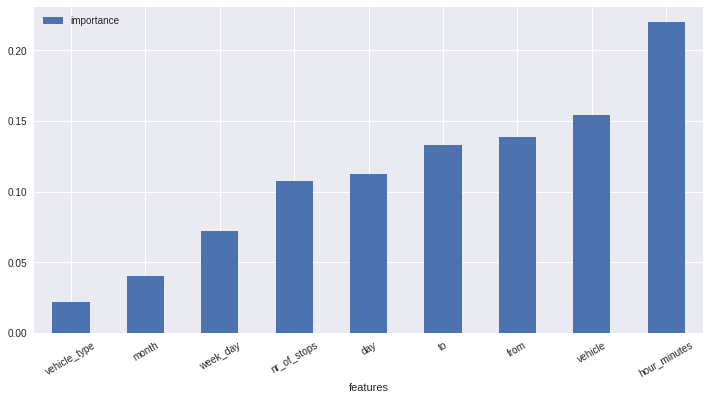

In [51]:
features=X_train.columns
f_imp=list(zip(X_train[features], rand_model.feature_importances_))
f_imp=pd.DataFrame(f_imp, columns=['features','importance'])
f_imp.sort_values(by = 'importance', inplace = True)

f_imp.plot.bar(x='features',y='importance')
plt.rcParams['figure.figsize']=12,6
plt.xticks(rotation=30)

f_imp

### XGboost

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

target=LabelEncoder().fit_transform(Y_train)

param= {'objective':['multi:softmax'],'learning_rate': [0.05,.01],'max_depth': [4,6,8],
        'min_child_weight': [11],'silent': [1],'subsample': [0.7],'colsample_bytree': [0.7],
        'n_estimators': [300,400],'missing':[-999],'seed': [1337]  }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

grid_search=GridSearchCV(estimator=XGBClassifier(),param_grid=param, scoring='accuracy',n_jobs=2, cv=kfold, verbose=1)

grid_search.fit(X_train, target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  3.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'objective': ['multi:softmax'], 'learning_rate': [0.05, 0.01], 'max_depth': [4, 6, 8], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.7], 'n_estimators': [300, 400], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [53]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=11, missing=-999, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1337, silent=1, subsample=0.7)

In [54]:
xgb_model=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=11, missing=-999, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1337, silent=1, subsample=0.7)

xgb_model.fit(X_train, Y_train)
pred=xgb_model.predict(X_test)

metrics.confusion_matrix(Y_test,pred)
metrics.accuracy_score(Y_test,pred), metrics.cohen_kappa_score(Y_test,pred)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=11, missing=-999, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1337, silent=1, subsample=0.7)

array([[158,  71,  66],
       [ 77, 239,  55],
       [ 62,  66, 106]])

(0.55888888888888888, 0.32555764660579756)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

,features,importance
7,vehicle_type,0.009133
1,month,0.030869
0,week_day,0.067114
8,nr_of_stops,0.087288
2,day,0.113706
4,to,0.126134
3,from,0.145673
5,vehicle,0.190069
6,hour_minutes,0.230013


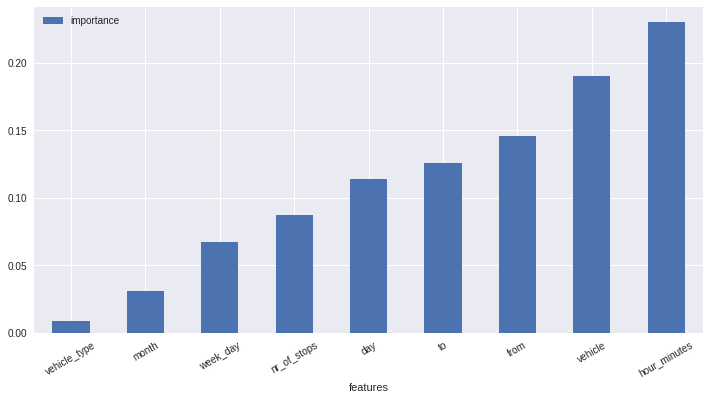

In [47]:
features=X_train.columns
f_imp=list(zip(X_train[features], xgb_model.feature_importances_))
f_imp=pd.DataFrame(f_imp, columns=['features','importance'])
f_imp.sort_values(by = 'importance', inplace = True)

f_imp.plot.bar(x='features',y='importance')
plt.rcParams['figure.figsize']=12,6
plt.xticks(rotation=30)

f_imp

### Bagging

In [55]:
from sklearn import ensemble
bag_model = ensemble.bagging.BaggingClassifier(n_estimators= 700,  max_features=0.5, max_samples=.6)
bag_model.fit(X = X_train, y = Y_train)
pred=bag_model.predict(X = X_test)

metrics.confusion_matrix(Y_test,pred)
metrics.accuracy_score(Y_test,pred), metrics.cohen_kappa_score(Y_test,pred)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.5, max_samples=0.6,
         n_estimators=700, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

array([[166,  75,  54],
       [ 73, 258,  40],
       [ 56,  84,  94]])

(0.5755555555555556, 0.34423853085016287)

In [49]:
pred_test=xgb_model.predict(test)

In [50]:
output=pd.DataFrame({'id':range(0,len(pred_test)), 'occupancy':pred_test})
output.to_csv('/home/ashwani/Desktop/output.csv', index=False)
